This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 8s 21ms/step - loss: 0.6196 - accuracy: 0.8117 - val_loss: 0.2889 - val_accuracy: 0.9163
Epoch 2/2
375/375 [==============================] - 8s 20ms/step - loss: 0.2458 - accuracy: 0.9232 - val_loss: 0.2407 - val_accuracy: 0.9308
Epoch 1/2
375/375 [==============================] - 8s 21ms/step - loss: 0.2861 - accuracy: 0.9176 - val_loss: 0.1581 - val_accuracy: 0.9539
Epoch 2/2
375/375 [==============================] - 8s 20ms/step - loss: 0.1182 - accuracy: 0.9644 - val_loss: 0.1027 - val_accuracy: 0.9714


**Plotting a validation accuracy comparison**

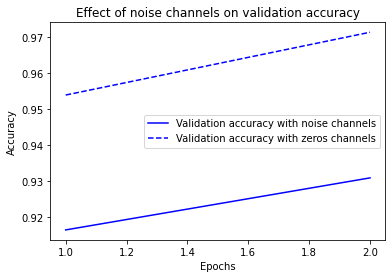

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 3)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 6s 14ms/step - loss: 2.3181 - accuracy: 0.1014 - val_loss: 2.3065 - val_accuracy: 0.1047
Epoch 2/2
375/375 [==============================] - 5s 12ms/step - loss: 2.3007 - accuracy: 0.1147 - val_loss: 2.3105 - val_accuracy: 0.1061


#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 5s 13ms/step - loss: 892.5743 - accuracy: 0.3634 - val_loss: 2.3721 - val_accuracy: 0.2193
Epoch 2/2
375/375 [==============================] - 5s 12ms/step - loss: 6.2145 - accuracy: 0.2425 - val_loss: 2.6797 - val_accuracy: 0.2114


**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 5s 13ms/step - loss: 0.3586 - accuracy: 0.9132 - val_loss: 0.1601 - val_accuracy: 0.9564
Epoch 2/2
375/375 [==============================] - 5s 12ms/step - loss: 0.1408 - accuracy: 0.9642 - val_loss: 0.1447 - val_accuracy: 0.9646


### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 2s 4ms/step - loss: 0.6679 - accuracy: 0.8353 - val_loss: 0.3593 - val_accuracy: 0.9042
Epoch 2/2
375/375 [==============================] - 1s 4ms/step - loss: 0.3517 - accuracy: 0.9032 - val_loss: 0.3093 - val_accuracy: 0.9141


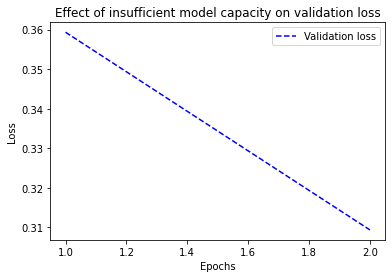

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 3)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 3s 7ms/step - loss: 0.3644 - accuracy: 0.8970 - val_loss: 0.1884 - val_accuracy: 0.9441
Epoch 2/2
375/375 [==============================] - 2s 6ms/step - loss: 0.1575 - accuracy: 0.9537 - val_loss: 0.1482 - val_accuracy: 0.9579


## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 54ms/step - loss: 0.5230 - accuracy: 0.7808 - val_loss: 0.3870 - val_accuracy: 0.8705
Epoch 2/2
30/30 [==============================] - 1s 38ms/step - loss: 0.3101 - accuracy: 0.9013 - val_loss: 0.3049 - val_accuracy: 0.8910


**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 51ms/step - loss: 0.6322 - accuracy: 0.7833 - val_loss: 0.5711 - val_accuracy: 0.8365
Epoch 2/2
30/30 [==============================] - 1s 36ms/step - loss: 0.5142 - accuracy: 0.8745 - val_loss: 0.4771 - val_accuracy: 0.8661


**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 10s 311ms/step - loss: 0.5385 - accuracy: 0.7519 - val_loss: 0.5664 - val_accuracy: 0.7428
Epoch 2/2
30/30 [==============================] - 9s 305ms/step - loss: 0.2509 - accuracy: 0.8985 - val_loss: 0.5471 - val_accuracy: 0.7762


#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 55ms/step - loss: 0.5672 - accuracy: 0.7927 - val_loss: 0.4277 - val_accuracy: 0.8705
Epoch 2/2
30/30 [==============================] - 1s 38ms/step - loss: 0.3669 - accuracy: 0.9006 - val_loss: 0.3721 - val_accuracy: 0.8830


**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 52ms/step - loss: 0.6388 - accuracy: 0.6339 - val_loss: 0.5306 - val_accuracy: 0.8478
Epoch 2/2
30/30 [==============================] - 1s 39ms/step - loss: 0.5270 - accuracy: 0.7596 - val_loss: 0.4165 - val_accuracy: 0.8724


## Summary